In [1]:
par_bkg_120_350 = [1.71869e+02, -7.88702e-04]
par_sig_120_350_gaus = [4.49195e+01, 1.25000e+05, 1.28095e+03]

par_bkg_170_350 = [4.11184e+01, -1.58028e-04]
par_sig_170_350_gaus = [1.42257e+01, 1.25000e+05, -1.94097e+03]

par_bkg_cutcomb4 = [-4.67015e+03, 7.55882e-01, -1.24525e-05, 7.48911e-11, -1.56801e-16]
par_sig_cutcomb4_gaus = [1.66537e+02, 1.25000e+05, 1.45680e+03]
par_mc_cutcomb4 = [125e3, 2.38e3, 1.6, 30, 1.73, 40]

par_mc_final = [125e3, 2.35e3, 1.79, 15, 1.71, 80]
par_mc_final_const = 302.13
par_bkg_final = [-1.05407e+05,3.59780e+00, -4.31961e-05, 2.23630e-10, -4.26797e-16]

par_bkg_default = [-5.95824e+04, 2.95685e+00, -4.27554e-05, 2.49791e-10, -5.20674e-16]
par_sig_default = [1.79175e+02, 1.25000e+05, -2.27252e+03]
par_mc_default = [125e3, 2.37e3, 1.69, 15, 1.72, 80]

In [2]:
import math

par_sig = par_sig_default.copy()
par_bkg = par_bkg_default.copy()
par_mc = par_mc_default.copy()

def tot_gaus(x, p):
    
    result = par_bkg[0] + par_bkg[1] * x[0] + par_bkg[2] * x[0]**2 + par_bkg[3] * x[0]**3 + par_bkg[4] * x[0]**4
#     result = par_bkg[0] + par_bkg[1] * x[0]  # pol1
    
    if (x[0] >= 120e3 and x[0] <= 130e3):
        
        result += par_sig[0] * math.exp(-0.5 * ((x[0] - par_sig[1]) / par_sig[2])**2)
        
    return result

def tot_dscb(x, p):
    
    s = (x[0] - par_mc[0]) / par_mc[1]
    a1, n1, a2, n2 = par_mc[2], par_mc[3], par_mc[4], par_mc[5]
    p[0] = 0.33 * 380.61
    
    result = par_bkg[0] + par_bkg[1] * x[0] + par_bkg[2] * x[0]**2 + par_bkg[3] * x[0]**3 + par_bkg[4] * x[0]**4
    
    if (x[0] >= 120e3 and x[0] <= 130e3):
        
        if (n1 / abs(a1) - abs(a1) - s) > 0 and (n2 / abs(a2) - abs(a2) + s) > 0:

            A1 = math.pow((n1 / abs(a1)), n1) * math.exp(-a1**2 / 2)
            A2 = math.pow((n2 / abs(a2)), n2) * math.exp(-a2**2 / 2)
            B1 = math.pow((n1 / abs(a1) - abs(a1) - s), -n1)
            B2 = math.pow((n2 / abs(a2) - abs(a2) + s), -n2)

            if s < -a1:
                result += p[0] * A1 * B1
            elif s > a2:
                result += p[0] * A2 * B2
            else:
                result += p[0] * math.exp(-s**2 / 2)

    return result


def dscb_single(x, p):

    s = (x[0] - par_mc[0]) / par_mc[1]
    a1, n1, a2, n2 = par_mc[2], par_mc[3], par_mc[4], par_mc[5]
    p[0] = 0.33 *380.61
    
    result = 0
    
    if (x[0] >= 120e3 and x[0] <= 130e3):
        
        if (n1 / abs(a1) - abs(a1) - s) > 0 and (n2 / abs(a2) - abs(a2) + s) > 0:

            A1 = math.pow((n1 / abs(a1)), n1) * math.exp(-a1**2 / 2)
            A2 = math.pow((n2 / abs(a2)), n2) * math.exp(-a2**2 / 2)
            B1 = math.pow((n1 / abs(a1) - abs(a1) - s), -n1)
            B2 = math.pow((n2 / abs(a2) - abs(a2) + s), -n2)

            if s < -a1:
                result += p[0] * A1 * B1
            elif s > a2:
                result += p[0] * A2 * B2
            else:
                result += p[0] * math.exp(-s**2 / 2)

    return result

188.56591796875
 FCN=22.489 FROM HESSE     STATUS=NOT POSDEF     31 CALLS         232 TOTAL
                     EDM=1.75135e-06    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -5.95794e+04   7.59361e+01   1.42048e-02  -1.39916e-06
   2  p1           2.95723e+00   7.69243e-04   7.05058e-07   8.58144e-01
   3  p2          -4.27573e-05   5.54809e-09   1.01941e-11  -2.09694e+05
   4  p3           2.49778e-10   3.56763e-14   5.95517e-17   2.34382e+10
   5  p4          -5.20609e-16   1.95650e-19   1.24123e-22  -9.72275e+14
 FCN=962.24 FROM HESSE     STATUS=OK             10 CALLS         113 TOTAL
                     EDM=3.26242e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 2
Info in <TCanvas::Print>: pdf file Extracted.pdf has been created


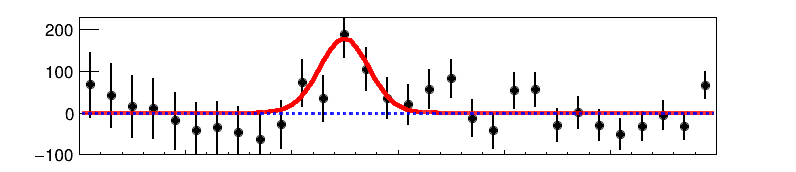

In [3]:
import ROOT as r
from ROOT import *
from FitFunctions import *
from PlotSetting import *


canvas = r.TCanvas("2")

f_invMass = r.TFile("out/Final_combinations/DATA_final_8.root", "READ")
f_invMass_MC = r.TFile("out/Final_combinations/MC_final_8.root", "READ")
invMass = f_invMass.Get("invMass")
invMass_MC = f_invMass_MC.Get("invMass")
invMass.SetDirectory(0)
invMass_MC.SetDirectory(0)
f_invMass.Close()
f_invMass_MC.Close()

invMass_0 = invMass.Clone("Copy of original data")
invMass_bkg = invMass.Clone("Background fit") 
invMass_gaus = invMass.Clone("Gaussian signal fit")
invMass_dscb = invMass.Clone("DSCB signal fit")

fit_func_str = "quartic_bkg"

quartic_fit = r.TF1("quartic_bkg", quartic_bkg, 100e3, 160e3, 5)
# quartic_fit.SetParameters(-1e4, 1, -1e-5, 9e-11, -1e-16)  
quartic_fit.SetParameters(-1.07093e+05, 3.62486e+00, -4.32249e-05, 2.22406e-10, -4.22052e-16)


invMass_bkg.Fit("quartic_bkg", "M, S")

fitted_bkg = invMass_bkg.GetFunction("quartic_bkg")

fit_bkg_pars = fitted_bkg.GetParameters()
fit_bkg_par_errors = fitted_bkg.GetParErrors()

original_errors = []

for i in range(invMass.GetNbinsX()):
    
    original_errors = original_errors + [invMass.GetBinError(i + 1)]

# Subtract the background
SUBTRACTED = True
if (SUBTRACTED):

    for i in range(invMass.GetNbinsX() ):
        invMass_0.AddBinContent(i+1 , -1 * (fitted_bkg(invMass_0.GetBinCenter(i+1))))
        invMass_0.SetBinError(i+1, original_errors[i])
        invMass_gaus.AddBinContent(i+1 , -1 * (fitted_bkg(invMass_gaus.GetBinCenter(i+1))))
        invMass_dscb.AddBinContent(i+1 , -1 * (fitted_bkg(invMass_dscb.GetBinCenter(i+1))))
        
# Fit the data signal
    
GAUS_FIT = True
if (GAUS_FIT):
    gaus1 = r.TF1("gaus1", gaus_1, 100e3, 160e3, 3)
    gaus1.SetParameters(1, 125e3, 5e4)
    gaus1.FixParameter(1, 125e3)
    
    # print(invMass_gaus.GetBinContent(13))
    # invMass_gaus.SetBinError(12, 0)

    invMass_gaus.Fit("gaus1", "M, S, B, R")
    fitted_gaus = invMass_gaus.GetFunction("gaus1")

    fitted_gaus.SetLineColorAlpha(2, 0.8)

r.gStyle.SetOptStat(0)
r.gStyle.SetErrorX(0)

FINAL_RESULT = 1

# See results of background fit
if (FINAL_RESULT == 0):
    
    set_canvas_size(500, 700)
    set_titles(invMass, "", "", "")
    
    fitted_bkg.SetLineStyle(1)
    fitted_bkg.SetLineColorAlpha(2, 0.9)
    fitted_bkg.SetLineWidth(3)
    
    invMass.SetMarkerStyle(8)
    
    invMass.GetYaxis().SetRangeUser(0, 8000)
    invMass.Draw("E")
    fitted_bkg.Draw("SAME")
    
# See results of extracting
if (FINAL_RESULT == 1):
    
    set_canvas_size(200, 800)
  
    invMass_0.SetMarkerStyle(8)
    invMass_0.SetLineWidth(2)
    
    set_titles(invMass_0, "", "", "")
    set_label(invMass_0, 0, 0.11)
    
    null_bkg = r.TF1("null", "0*x", 100e3, 160e3)
    null_bkg.SetLineColorAlpha(4, 0.8)
    null_bkg.SetLineStyle(2)
    null_bkg.SetLineWidth(3)
    
    fitted_gaus.SetLineWidth(4)
    
    invMass_0.GetYaxis().SetRangeUser(-100, 230)
    invMass_0.SetNdivisions(5, "Y")
    invMass_0.Draw("E")
    fitted_gaus.Draw("SAME")
    null_bkg.Draw("SAME")
    
if (FINAL_RESULT == 1.5):
    
    set_canvas_size(200, 800)
  
    invMass_0.SetMarkerStyle(8)
    invMass_0.SetLineWidth(2)
    
    set_titles(invMass_0, "", "", "")
    set_label(invMass_0, 0., 0.)
    
    null_bkg = r.TF1("null", "0*x", 100e3, 160e3)
    null_bkg.SetLineColorAlpha(4, 0.8)
    null_bkg.SetLineStyle(2)
    null_bkg.SetLineWidth(3)
    
    dscb = r.TF1("dscb", dscb_single, 100e3, 160e3, 1)
    
    dscb.SetLineWidth(3)
    
    invMass_0.GetYaxis().SetRangeUser(-100, 200)
#     invMass_0.SetNdivisions(5, "Y")
    invMass_0.Draw("E")
    dscb.Draw("SAME")
    null_bkg.Draw("SAME")
    
# Include the Gaussian fit
if (FINAL_RESULT == 2):
    
    set_canvas_size(500, 700)
    set_titles(invMass_0, "", "", "")
    
    fitted_tot = r.TF1("fitted_tot", tot_dscb, 100e3, 160e3, 1)
    
    fitted_bkg.SetLineStyle(2)
    fitted_bkg.SetLineColorAlpha(4, 0.9)
    fitted_bkg.SetLineWidth(3)
    
    fitted_tot.SetLineColorAlpha(2, 1)
    fitted_tot.SetLineWidth(4)
    
    invMass.SetMarkerStyle(8)
    
    fitted_bkg.GetYaxis().SetRangeUser(0, 8000)
    invMass.GetYaxis().SetRangeUser(0, 8000)
    fitted_bkg.Draw("")
    fitted_tot.Draw("SAME")
    invMass.Draw("SAME, E")
    
    
# Total (include MC)
if (FINAL_RESULT == 3):
    
    set_canvas_size(500, 700)
    set_titles(invMass_MC, "", "", "")
    
    fitted_tot = r.TF1("fitted_tot", tot_gaus, 100e3, 160e3, 1)
    
    fitted_bkg.SetLineStyle(2)
    fitted_bkg.SetLineColorAlpha(4, 0.9)
    fitted_bkg.SetLineWidth(3)
    
    fitted_tot.SetLineColorAlpha(2, 0.75)
    fitted_tot.SetLineWidth(4)
    
    invMass.SetMarkerStyle(8)
    invMass.SetLineWidth(2)
    
    invMass_MC.GetYaxis().SetRangeUser(0, 9000)
    invMass_MC.GetYaxis().SetRangeUser(0, 9000)
    invMass_MC.GetYaxis().ChangeLabel(1, 0, 0)
    invMass_MC.GetXaxis().SetLabelSize(0)
    
    invMass_MC.Draw("HIST")
    fitted_bkg.Draw("SAME")
    fitted_tot.Draw("SAME")
    invMass.Draw("E, SAME")
    

canvas.Draw()
canvas.SaveAs("Extracted.pdf")